In [53]:
%matplotlib inline
import os
import sys
import json
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets
import torchvision.transforms as T

In [4]:
###   DATA   ###

# Pathing
dpath = os.environ['HOME'] + '/.Data/COCO'
anno_fpath = dpath + '/annotations/instances_train2017.json' 
img_dpath  = dpath + '/train2017'
img_fpaths = glob(img_dpath + '/*.jpg')  # N: 118,287
img_fpath = img_dpath + '/000000{}.jpg'

In [ ]:
###  LOAD DATA   ###

# JUST USE torchvision CocoDetection

# Load
#with open(anno_fpath) as jfile:
#    instances = json.load(jfile)

#annotations = instances['annotations']
#categories  = instances['categories']
#classes = {cat['id']: cat['name'] for cat in categories}

In [39]:
###  LOAD DATA   ###
transform = T.Compose([
    T.Resize((480, 640)), # NB: plt.imshow req channel last format
    T.ToTensor(),
    ])

coco_train = datasets.CocoDetection(root=img_dpath, 
                                    annFile=anno_fpath,
                                    transform=transform)

loading annotations into memory...
Done (t=11.66s)
creating index...
index created!


In [55]:
tensor_img, target = coco_train[4]
img = np.rollaxis(tensor_img.numpy(), 0, 3)

(-0.5, 639.5, 479.5, -0.5)

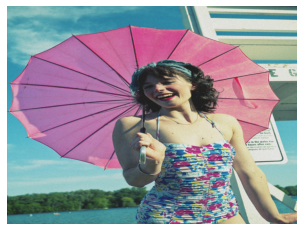

In [56]:
plt.imshow(img)
plt.axis('off')